In [120]:
import pandas as pd
df=pd.read_csv('vestiaire.csv')
df.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,Tourcoing,25775970,vitalii25775970,NaN,Germany,3.0,14.0,0.0,13.0,0.0
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,Tourcoing,13698770,olivia13698770,NaN,Belgium,0.0,0.0,0.0,8.0,0.0
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,...,Tourcoing,6042365,cecilia6042365,1-2 days,Spain,58.0,69.0,0.0,62.0,96.0
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,...,Brooklyn,13172949,gretchen13172949,1-2 days,United States,63.0,274.0,126346.0,131.0,96.0
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,...,Crawley,2578605,crunchykat,3-5 days,United Kingdom,19.0,14.0,102821.0,40.0,89.0


In [121]:
df.shape

(900514, 36)

In [122]:
# prompt: drop columns from seller_badge to the end

df = df.loc[:, :'seller_badge']
df.drop(['product_description','brand_url','product_id','product_name'], axis=1,inplace=True)
df.head()

,product_type,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,sold,reserved,available,in_stock,should_be_gone,brand_id,brand_name,product_material,product_color,price_usd,seller_price,seller_earning,seller_badge
0,Wool mini skirt,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,True,False,True,False,False,117,Miu Miu,Wool,Grey,272.92,223.65,216.94,Common
1,Jacket,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,False,False,True,False,False,161,Barbara Bui,Cotton,Navy,127.80,106.50,106.50,Common
2,Wool coat,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,False,False,True,False,False,391,Comme Des Garcons,Wool,White,1278.00,1065.00,926.55,Expert
3,Mini skirt,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,False,False,True,False,False,2797,MSGM,Polyester,Black,163.90,149.00,126.65,Expert
4,Vegan leather trousers,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,False,False,True,False,False,11956,LVIR,Vegan leather,Black,119.72,99.77,83.55,Common


In [123]:
print(df.isnull().sum())  # Check missing values
# df.fillna(df.mean(), inplace=True)  # Fill missing values with mean
df.dropna(inplace=True)

product_type                0
product_keywords         1183
product_gender_target       0
product_category         1183
product_season              2
product_condition           0
product_like_count          0
sold                        0
reserved                    0
available                   0
in_stock                    0
should_be_gone              0
brand_id                    0
brand_name                  0
product_material            4
product_color               1
price_usd                   0
seller_price                0
seller_earning              0
seller_badge                0
dtype: int64


EDA

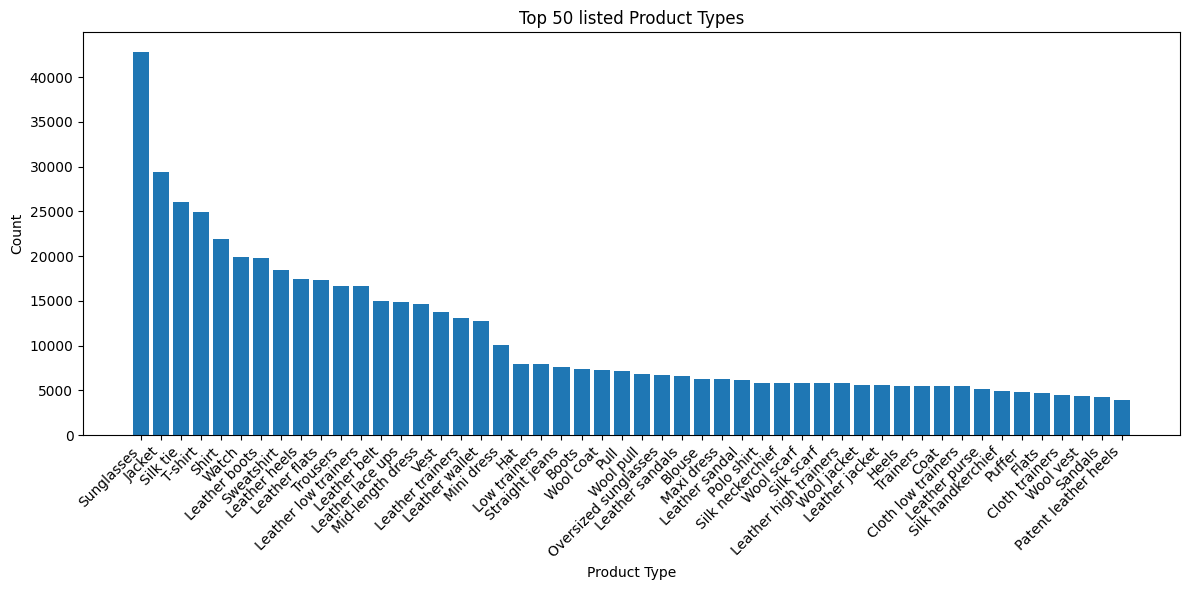

In [124]:
# prompt: bar chart group by product_type, top 100

import matplotlib.pyplot as plt

# Assuming 'product_type' is a column in your DataFrame 'df'
product_counts = df['product_type'].value_counts().nlargest(50)

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(product_counts.index, product_counts.values)
plt.xlabel("Product Type")
plt.ylabel("Count")
plt.title("Top 50 listed Product Types")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


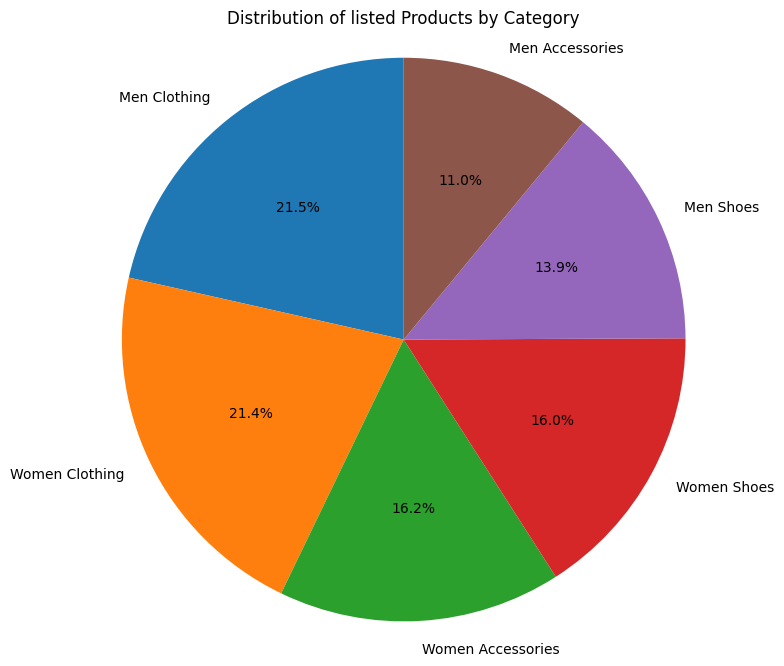

In [125]:
# pie chart by product_category

import matplotlib.pyplot as plt

# Assuming 'product_category' is a column in your DataFrame 'df'
product_category_counts = df['product_category'].value_counts()

plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(product_category_counts, labels=product_category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of listed Products by Category")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


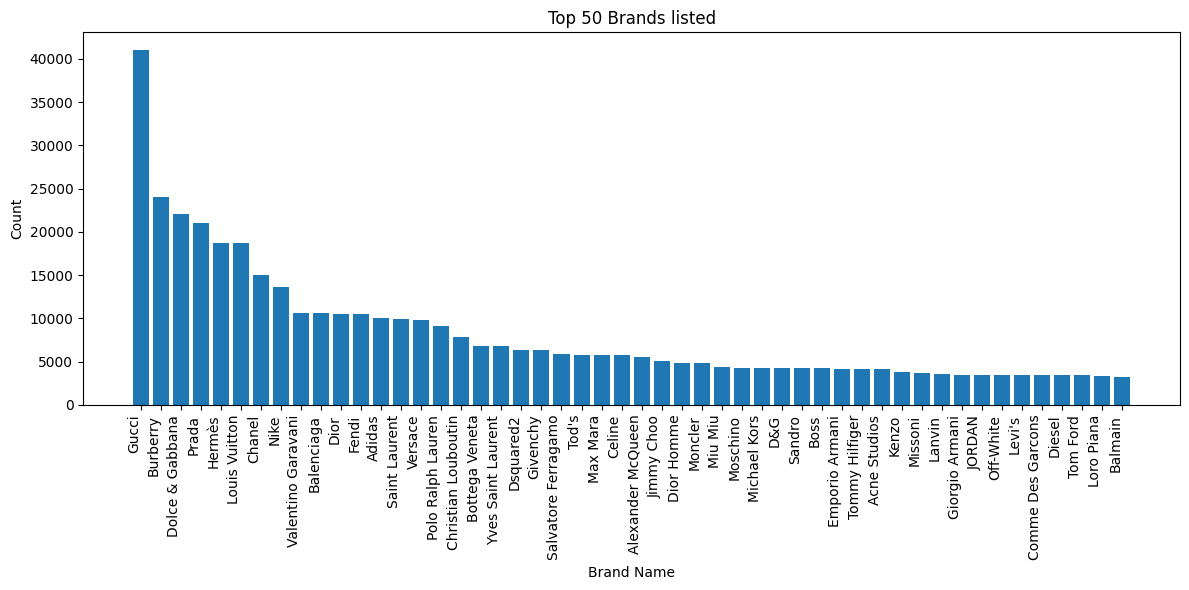

In [126]:
#  top 50 brand name

import pandas as pd
import matplotlib.pyplot as plt


# Group by brand name and get the top 50
top_50_brands = df['brand_name'].value_counts().nlargest(50)

# Create a bar plot for the top 50 brands
plt.figure(figsize=(12, 6))
plt.bar(top_50_brands.index, top_50_brands.values)
plt.xlabel("Brand Name")
plt.ylabel("Count")
plt.title("Top 50 Brands listed")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


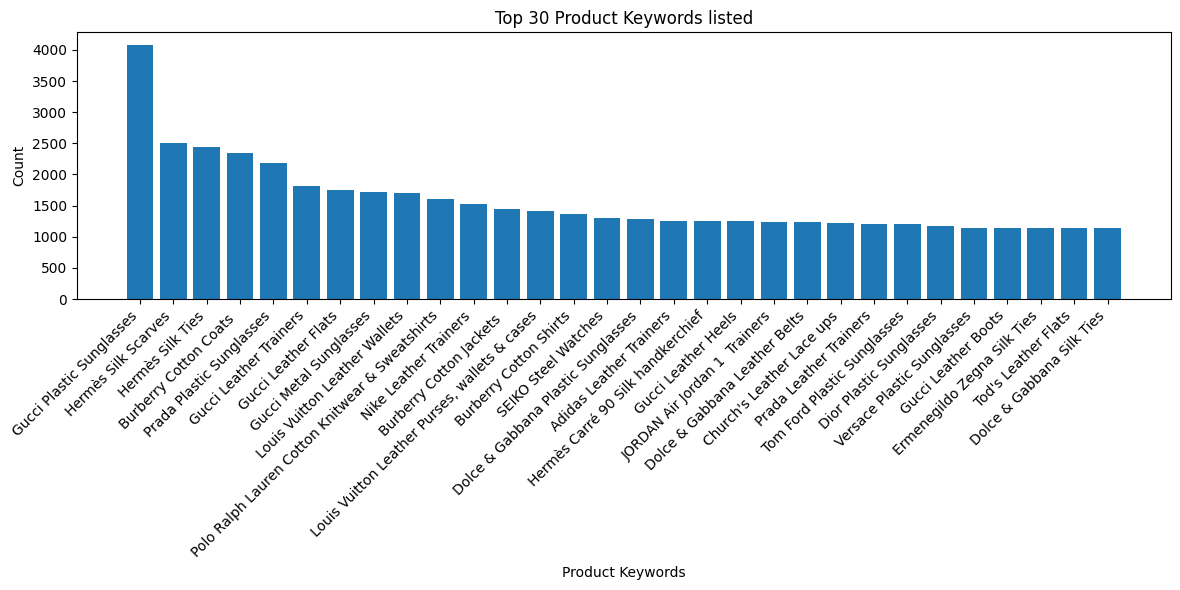

In [127]:
# top 30 product keywords

import matplotlib.pyplot as plt
# Assuming 'product_keywords' is a column in your DataFrame 'df'
# If not, replace 'product_keywords' with the actual column name containing keywords

product_keywords_counts = df['product_keywords'].value_counts().nlargest(30)

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(product_keywords_counts.index, product_keywords_counts.values)
plt.xlabel("Product Keywords")
plt.ylabel("Count")
plt.title("Top 30 Product Keywords listed")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


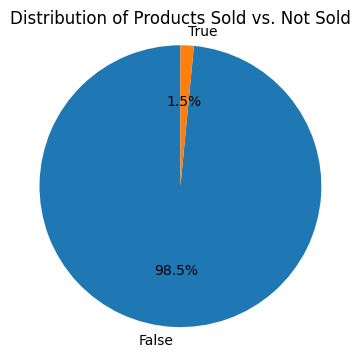

In [128]:
# pie chart of sold or not

import matplotlib.pyplot as plt
# Assuming 'sold' is a column indicating whether a product was sold (e.g., True/False, 1/0, 'Sold'/'Not Sold')
sold_counts = df['sold'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(sold_counts, labels=sold_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Products Sold vs. Not Sold")
plt.axis('equal')
plt.show()


Market Segmentation
1. analyzing the customer purchase preference through this website
2. extract useful information about the current state of the listing product


In [129]:
df_sold=df[df['sold']==True]
df_sold.head()

,product_type,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,sold,reserved,available,in_stock,should_be_gone,brand_id,brand_name,product_material,product_color,price_usd,seller_price,seller_earning,seller_badge
0,Wool mini skirt,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,True,False,True,False,False,117,Miu Miu,Wool,Grey,272.92,223.65,216.94,Common
9,Wool suit jacket,Dior Wool Jackets,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,True,False,True,False,False,10,Dior,Wool,Grey,437.97,358.91,312.25,Trusted
12,Silk maxi dress,La Perla Silk Dresses,Women,Women Clothing,All seasons,"Never worn, with tag",4.0,True,False,True,False,False,64,La Perla,Silk,Black,444.74,370.62,322.44,Common
19,Trousers,Gucci Cotton Trousers,Women,Women Clothing,All seasons,Very good condition,4.0,True,False,True,False,False,2,Gucci,Cotton,Beige,145.75,119.44,103.91,Common
53,Lingerie set,Agent Provocateur Polyamide Lingerie,Women,Women Clothing,All seasons,Very good condition,0.0,True,False,True,False,False,2658,Agent Provocateur,Polyamide,Black,55.37,46.14,42.40,Common


In [130]:
df_sold.shape

(13727, 20)

In [131]:
unique_categories = df_sold['product_category'].unique()
unique_categories

array(['Women Clothing', 'Men Clothing', 'Men Accessories',
       'Women Accessories', 'Men Shoes', 'Women Shoes'], dtype=object)

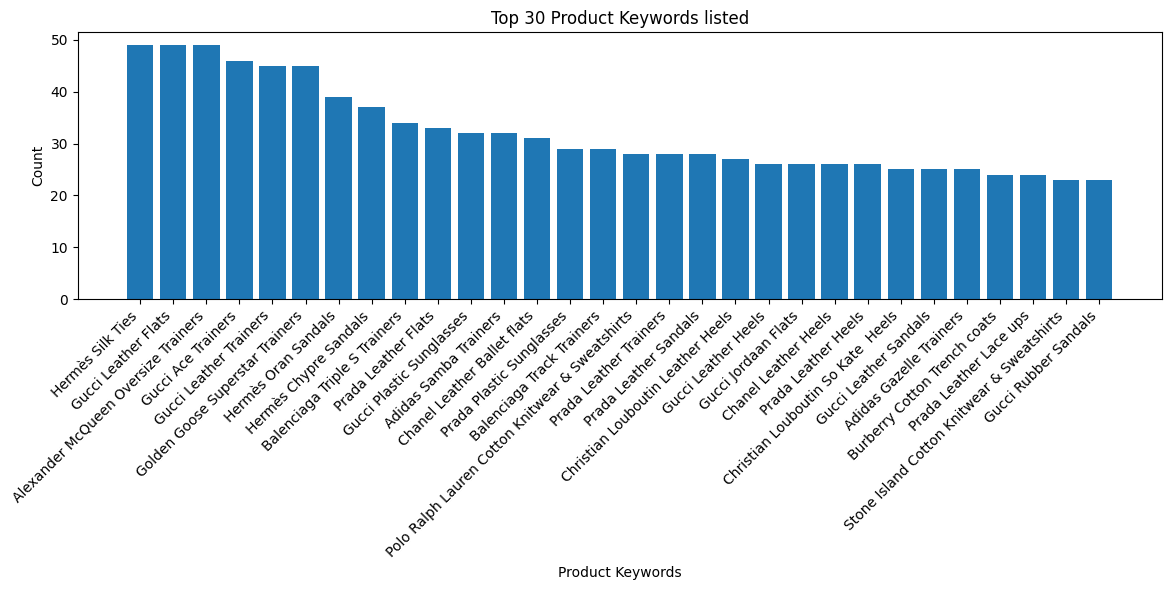

In [132]:
# prompt: bar chart top 30 product keywords

import matplotlib.pyplot as plt
# Assuming 'product_keywords' is a column in your DataFrame 'df'
# If not, replace 'product_keywords' with the actual column name containing keywords

product_keywords_counts = df_sold['product_keywords'].value_counts().nlargest(30)

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(product_keywords_counts.index, product_keywords_counts.values)
plt.xlabel("Product Keywords")
plt.ylabel("Count")
plt.title("Top 30 Product Keywords listed")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


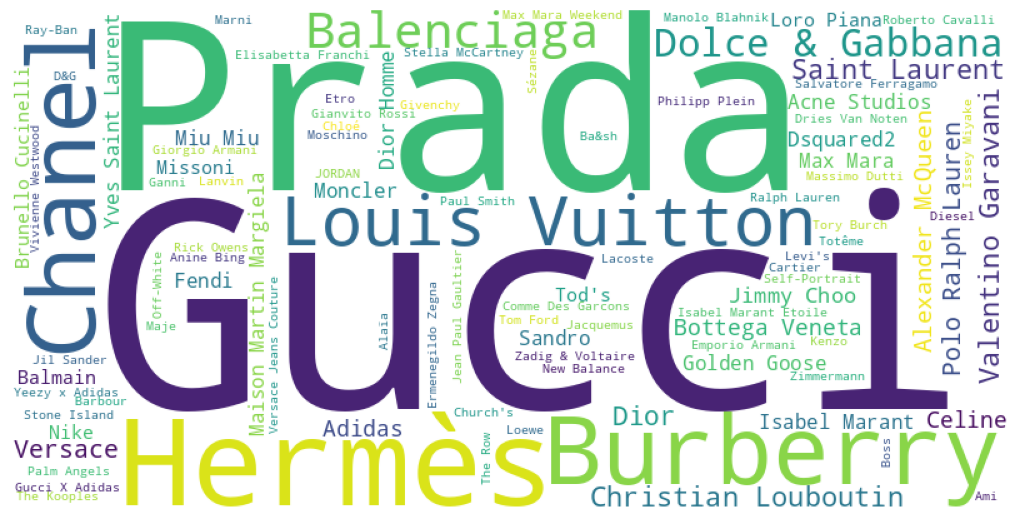

In [133]:
# prompt: word cloud of top 50 brand name of df_sold

!pip install wordcloud

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ... (Your existing code) ...

# Assuming df_sold is already defined as in your previous code

# Group by brand name and get the top 50
top_50_brands = df_sold['brand_name'].value_counts().nlargest(100)

# Create a dictionary from the top 50 brands and their counts
brand_counts_dict = dict(zip(top_50_brands.index, top_50_brands.values))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(brand_counts_dict)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


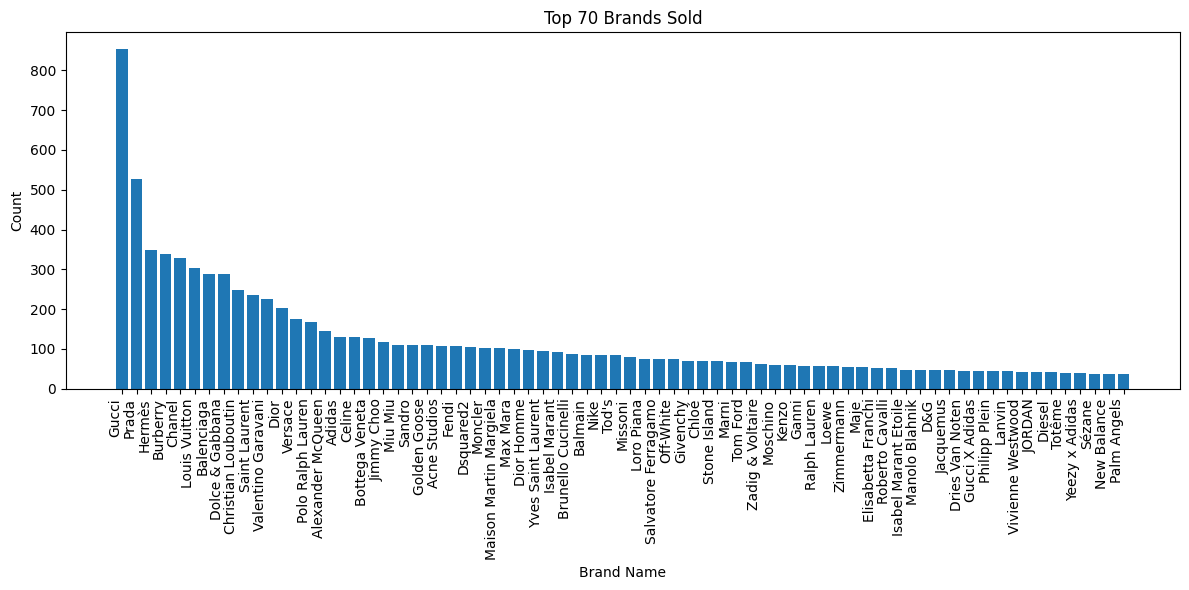

In [134]:
# prompt: bar chart on top 50 brand name of df_sold

import matplotlib.pyplot as plt
# Assuming df_sold is already defined as in your previous code

# Group by brand name and get the top 50
top_50_brands = df_sold['brand_name'].value_counts().nlargest(70)

# Create a bar plot for the top 50 brands
plt.figure(figsize=(12, 6))
plt.bar(top_50_brands.index, top_50_brands.values)
plt.xlabel("Brand Name")
plt.ylabel("Count")
plt.title("Top 70 Brands Sold")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


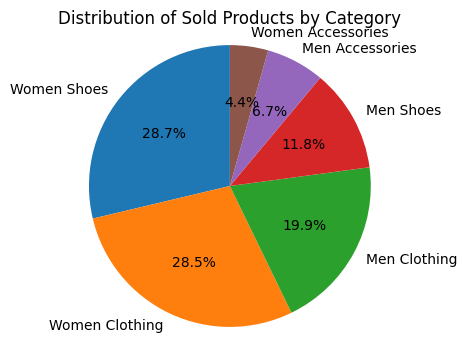

In [135]:
# pie chart on product category

import matplotlib.pyplot as plt
# Assuming df_sold is already defined as in your previous code

# Pie chart for product category on df_sold
product_category_counts_sold = df_sold['product_category'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(product_category_counts_sold, labels=product_category_counts_sold.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Sold Products by Category")
plt.axis('equal')
plt.show()




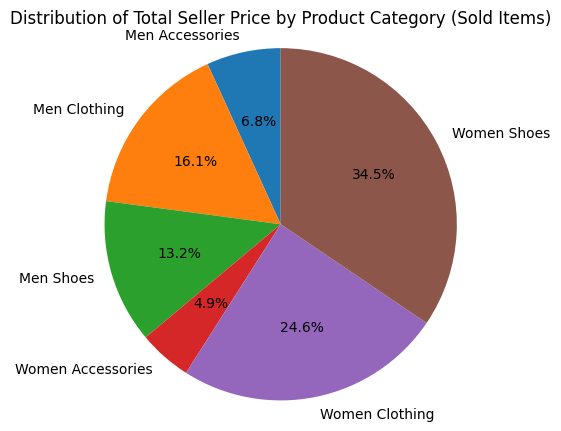

In [136]:
# pie chart on product category aggragated with seller_price

import matplotlib.pyplot as plt

# Assuming df_sold is already defined and contains the 'product_category' and 'seller_price' columns.

# Group by product category and sum the seller prices
category_prices = df_sold.groupby('product_category')['seller_price'].sum()

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(category_prices, labels=category_prices.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Total Seller Price by Product Category (Sold Items)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


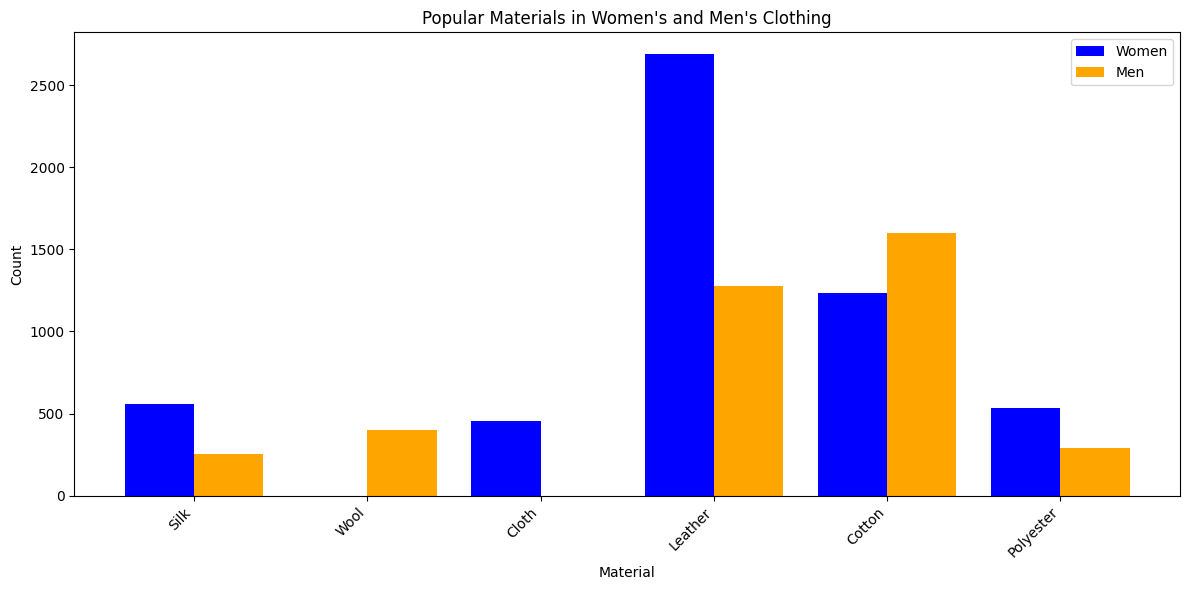

In [137]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_sold is your DataFrame and contains 'product_gender_target' and 'product_material'

# Filter for Women's and Men's clothing
womens_clothing = df_sold[df_sold['product_gender_target'] == 'Women']
mens_clothing = df_sold[df_sold['product_gender_target'] == 'Men']

# Count the occurrences of materials in women's and men's clothing
top_n = 5  # Top N materials
womens_materials = womens_clothing['product_material'].value_counts().nlargest(top_n)
mens_materials = mens_clothing['product_material'].value_counts().nlargest(top_n)

# Get the union of top materials for proper alignment
all_materials = list(set(womens_materials.index).union(set(mens_materials.index)))

# Get counts, setting to 0 if a material is missing in one category
womens_counts = [womens_materials.get(material, 0) for material in all_materials]
mens_counts = [mens_materials.get(material, 0) for material in all_materials]

# Bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.4
x = np.arange(len(all_materials))  # X locations for bars

plt.bar(x - bar_width/2, womens_counts, width=bar_width, label="Women", color="blue")
plt.bar(x + bar_width/2, mens_counts, width=bar_width, label="Men", color="orange")

# Labels and styling
plt.xlabel("Material")
plt.ylabel("Count")
plt.title("Popular Materials in Women's and Men's Clothing")
plt.xticks(x, all_materials, rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


In [138]:
df_sold.columns

Index(['product_type', 'product_keywords', 'product_gender_target',
       'product_category', 'product_season', 'product_condition',
       'product_like_count', 'sold', 'reserved', 'available', 'in_stock',
       'should_be_gone', 'brand_id', 'brand_name', 'product_material',
       'product_color', 'price_usd', 'seller_price', 'seller_earning',
       'seller_badge'],
      dtype='object')

In [139]:
## feature selection
df_sold = df_sold.drop(['reserved', 'available', 'in_stock', 'should_be_gone','sold'], axis=1)  # Drop single-value columns
df_sold = df_sold.drop(['seller_earning','brand_id','seller_badge'],axis=1)# drop inrrelavent columns

In [140]:
df_sold.head()

,product_type,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,brand_name,product_material,product_color,price_usd,seller_price
0,Wool mini skirt,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,Miu Miu,Wool,Grey,272.92,223.65
9,Wool suit jacket,Dior Wool Jackets,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,Dior,Wool,Grey,437.97,358.91
12,Silk maxi dress,La Perla Silk Dresses,Women,Women Clothing,All seasons,"Never worn, with tag",4.0,La Perla,Silk,Black,444.74,370.62
19,Trousers,Gucci Cotton Trousers,Women,Women Clothing,All seasons,Very good condition,4.0,Gucci,Cotton,Beige,145.75,119.44
53,Lingerie set,Agent Provocateur Polyamide Lingerie,Women,Women Clothing,All seasons,Very good condition,0.0,Agent Provocateur,Polyamide,Black,55.37,46.14


In [141]:
for col in df_sold.columns:
    unique_values = df[col].unique()
    print(f"Column: {col}")
    print(f"Unique Values ({len(unique_values)}): {unique_values[:10]}")  # Show first 10 unique values
    print("-" * 50)


Column: product_type
Unique Values (10984): ['Wool mini skirt' 'Jacket' 'Wool coat' 'Mini skirt'
 'Vegan leather trousers' 'Mid-length dress' 'Silk trousers'
 'Silk mid-length dress' 'Suit jacket' 'Wool suit jacket']
--------------------------------------------------
Column: product_keywords
Unique Values (124611): ['Miu Miu Wool Skirts' 'Barbara Bui Cotton Jackets'
 'Comme Des Garcons Wool Coats' 'MSGM Polyester Skirts'
 'LVIR Vegan leather Trousers' 'See by Chloé Cotton - elasthane Dresses'
 'Just Cavalli Silk Trousers' 'J.Crew Silk Dresses'
 'Aquascutum Cotton Jackets' 'Dior Wool Jackets']
--------------------------------------------------
Column: product_gender_target
Unique Values (2): ['Women' 'Men']
--------------------------------------------------
Column: product_category
Unique Values (6): ['Women Clothing' 'Men Clothing' 'Men Accessories' 'Women Accessories'
 'Men Shoes' 'Women Shoes']
--------------------------------------------------
Column: product_season
Unique Values (3

### Product preference segmentaion

feature engnieering

In [142]:
# One-hot encode categorical variables with low cardinality
df_encoded = pd.get_dummies(df_sold, columns=[
    'product_gender_target',
    'product_category',
    'product_season',
    'product_condition'
], drop_first=True)  # Drop first column to avoid multicollinearity

# feature engnieering of replace brand names with their average price or like count
df_encoded['brand_encoded'] = df_sold.groupby('brand_name')['price_usd'].transform('mean')
mean_brand = df_encoded['brand_encoded'].mean()  # Mean before standardization
std_brand = df_encoded['brand_encoded'].std()    # Std before standardization

# Frequency representation of product material and color
for col in ['product_material', 'product_color']:
    # Create new columns without modifying the original
    df_encoded[f'{col}_encoded'] = df[col].map(df[col].value_counts(normalize=True))


# numerial features
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Apply StandardScaler to numerical features
scaler_std = StandardScaler()
df_encoded[['price_usd']] = scaler_std.fit_transform(df_encoded[['price_usd']])

# Apply MinMaxScaler to categorical encodings or features with large variance
scaler_minmax = MinMaxScaler()
df_encoded[['brand_encoded', 'product_like_count']] = scaler_minmax.fit_transform(df_encoded[['brand_encoded', 'product_like_count']])

In [143]:
df_encoded.head()

,product_type,product_keywords,product_like_count,brand_name,product_material,product_color,price_usd,seller_price,product_gender_target_Women,product_category_Men Clothing,...,product_category_Women Shoes,product_season_Autumn / Winter,product_season_Spring / Summer,product_condition_Good condition,product_condition_Never worn,"product_condition_Never worn, with tag",product_condition_Very good condition,brand_encoded,product_material_encoded,product_color_encoded
0,Wool mini skirt,Miu Miu Wool Skirts,0.048159,Miu Miu,Wool,Grey,0.101480,223.65,True,False,...,False,True,False,False,True,False,False,0.021165,0.078277,0.058514
9,Wool suit jacket,Dior Wool Jackets,0.002833,Dior,Wool,Grey,0.591396,358.91,True,False,...,False,True,False,False,False,False,True,0.034379,0.078277,0.058514
12,Silk maxi dress,La Perla Silk Dresses,0.005666,La Perla,Silk,Black,0.611491,370.62,True,False,...,False,False,False,False,False,True,False,0.006988,0.074751,0.267595
19,Trousers,Gucci Cotton Trousers,0.005666,Gucci,Cotton,Beige,-0.275997,119.44,True,False,...,False,False,False,False,False,False,True,0.023216,0.184662,0.054485
53,Lingerie set,Agent Provocateur Polyamide Lingerie,0.000000,Agent Provocateur,Polyamide,Black,-0.544271,46.14,True,False,...,False,False,False,False,False,False,True,0.007433,0.016448,0.267595


In [144]:
df_color_material=df_encoded[['product_color_encoded','product_color','product_material_encoded','product_material']].drop_duplicates()
df_color_material.head()

,product_color_encoded,product_color,product_material_encoded,product_material
0,0.058514,Grey,0.078277,Wool
12,0.267595,Black,0.074751,Silk
19,0.054485,Beige,0.184662,Cotton
53,0.267595,Black,0.016448,Polyamide
91,0.267595,Black,0.184662,Cotton


feature selection

In [145]:
#feature selection
df_selected = df_encoded.drop(['product_type','product_material','product_color','product_keywords','brand_name','price_usd','seller_price','product_gender_target_Women'],axis=1)

In [146]:
df_selected.head()


,product_like_count,product_category_Men Clothing,product_category_Men Shoes,product_category_Women Accessories,product_category_Women Clothing,product_category_Women Shoes,product_season_Autumn / Winter,product_season_Spring / Summer,product_condition_Good condition,product_condition_Never worn,"product_condition_Never worn, with tag",product_condition_Very good condition,brand_encoded,product_material_encoded,product_color_encoded
0,0.048159,False,False,False,True,False,True,False,False,True,False,False,0.021165,0.078277,0.058514
9,0.002833,False,False,False,True,False,True,False,False,False,False,True,0.034379,0.078277,0.058514
12,0.005666,False,False,False,True,False,False,False,False,False,True,False,0.006988,0.074751,0.267595
19,0.005666,False,False,False,True,False,False,False,False,False,False,True,0.023216,0.184662,0.054485
53,0.000000,False,False,False,True,False,False,False,False,False,False,True,0.007433,0.016448,0.267595


In [147]:
df_selected.columns

Index(['product_like_count', 'product_category_Men Clothing',
       'product_category_Men Shoes', 'product_category_Women Accessories',
       'product_category_Women Clothing', 'product_category_Women Shoes',
       'product_season_Autumn / Winter', 'product_season_Spring / Summer',
       'product_condition_Good condition', 'product_condition_Never worn',
       'product_condition_Never worn, with tag',
       'product_condition_Very good condition', 'brand_encoded',
       'product_material_encoded', 'product_color_encoded'],
      dtype='object')

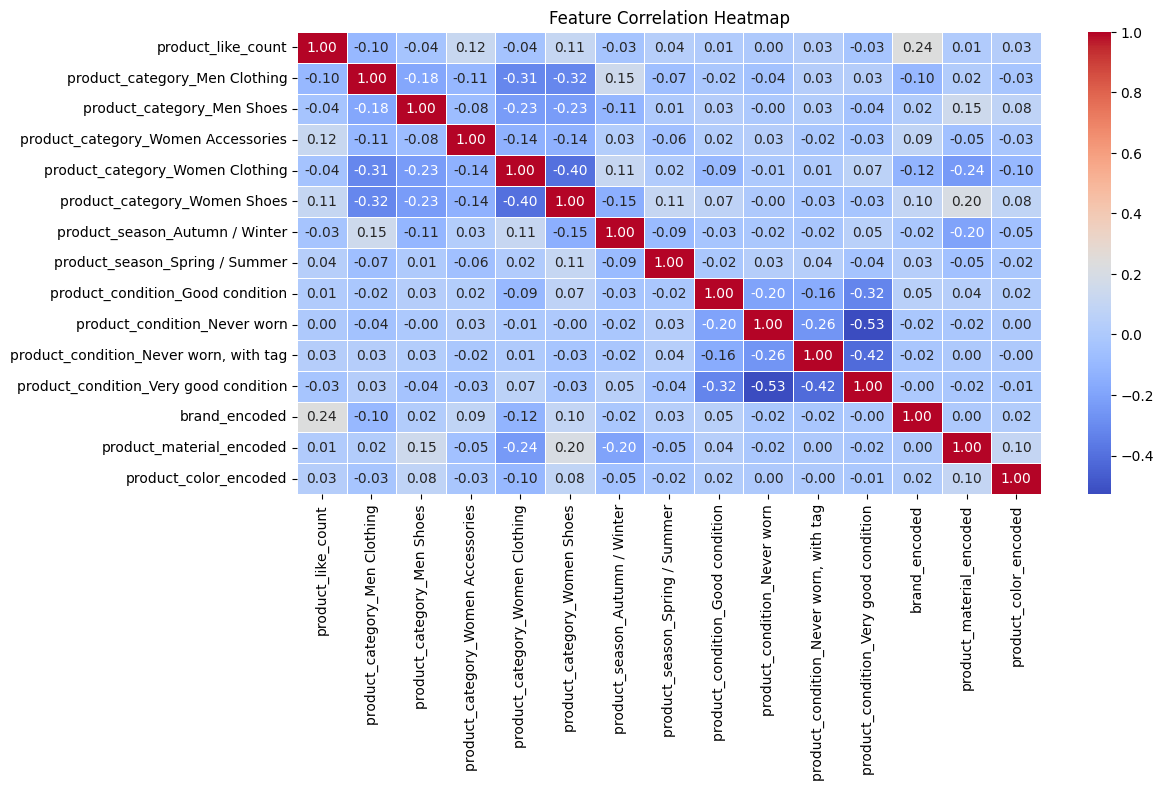

In [148]:
# correlation metrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df_selected.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


Clustering - K Means

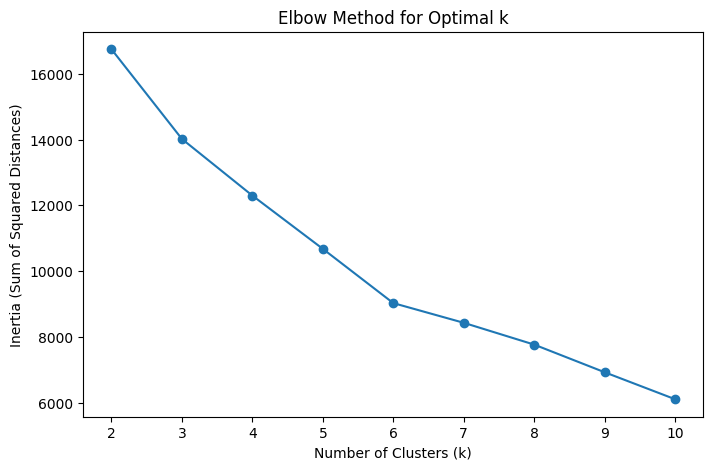

In [149]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Try different values of k
inertia = []
K_range = range(2, 11)  # Testing k from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_selected)
    inertia.append(kmeans.inertia_)  # Inertia (Sum of Squared Distances)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal k")
plt.show()


In [150]:
# Choose optimal k from elbow and silhouette score
optimal_k = 6  # Adjust based on elbow & silhouette score

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_selected['Cluster'] = kmeans.fit_predict(df_selected)

# Check cluster distribution
df_selected['Cluster'].value_counts()


,count
Cluster,
0,3412
3,2642
2,2339
1,2027
4,1789
5,1518


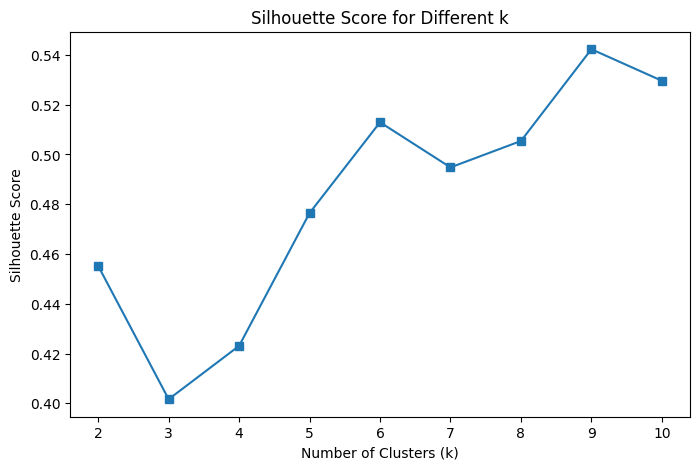

In [151]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_selected)
    silhouette_scores.append(silhouette_score(df_selected, labels))

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k")
plt.show()



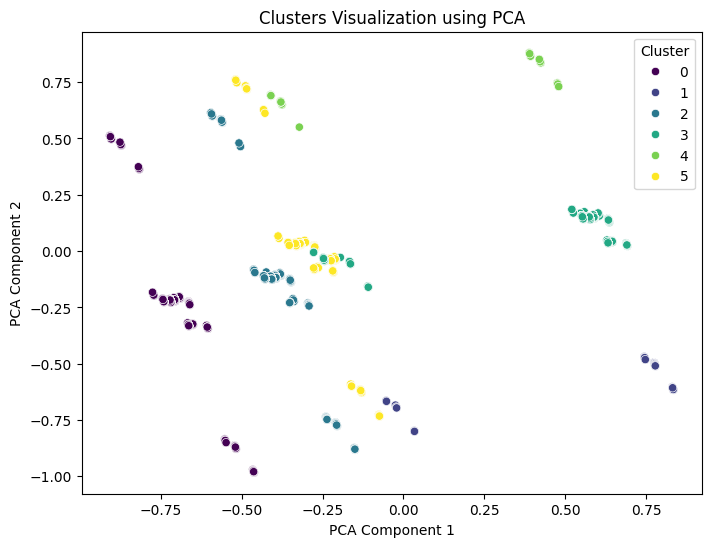

In [152]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_selected.drop(columns=['Cluster']))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_selected['Cluster'], palette='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters Visualization using PCA")
plt.legend(title="Cluster")
plt.show()


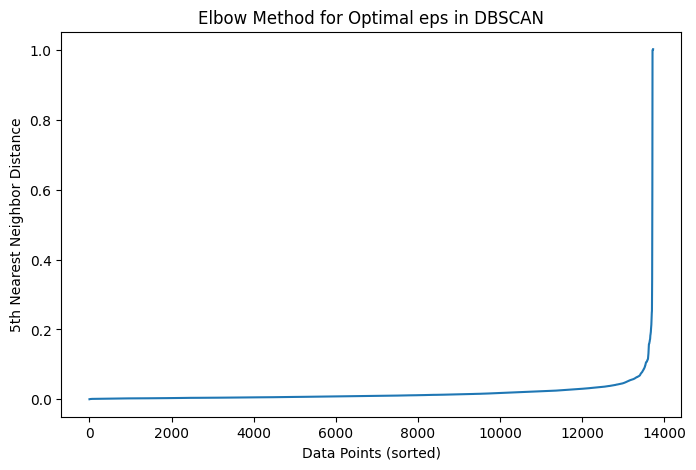

In [153]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Fit Nearest Neighbors model
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_selected)
distances, indices = neighbors_fit.kneighbors(df_selected)

# Sort distances and plot the elbow curve
distances = np.sort(distances[:, 4])  # 5th nearest neighbor distance
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Data Points (sorted)")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("Elbow Method for Optimal eps in DBSCAN")
plt.show()


In [154]:
from sklearn.cluster import DBSCAN

# Set best eps from elbow plot & experiment with min_samples
optimal_eps =2.5  # Adjust based on elbow plot
optimal_min_samples = 10  # Experiment with values

# Apply DBSCAN
dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
df_selected['Cluster'] = dbscan.fit_predict(df_selected)

# Check cluster distribution
print(df_selected['Cluster'].value_counts())


Cluster
0    13727
Name: count, dtype: int64


In [155]:
from sklearn.metrics import silhouette_score

# Remove noise points (-1) before evaluating
filtered_df = df_selected[df_selected['Cluster'] != -1]
filtered_labels = df_selected['Cluster'][df_selected['Cluster'] != -1]

# Compute Silhouette Score
if len(set(filtered_labels)) > 1:
    score = silhouette_score(filtered_df, filtered_labels)
    print("DBSCAN Silhouette Score:", score)
else:
    print("DBSCAN found only one cluster or too many outliers.")



DBSCAN found only one cluster or too many outliers.


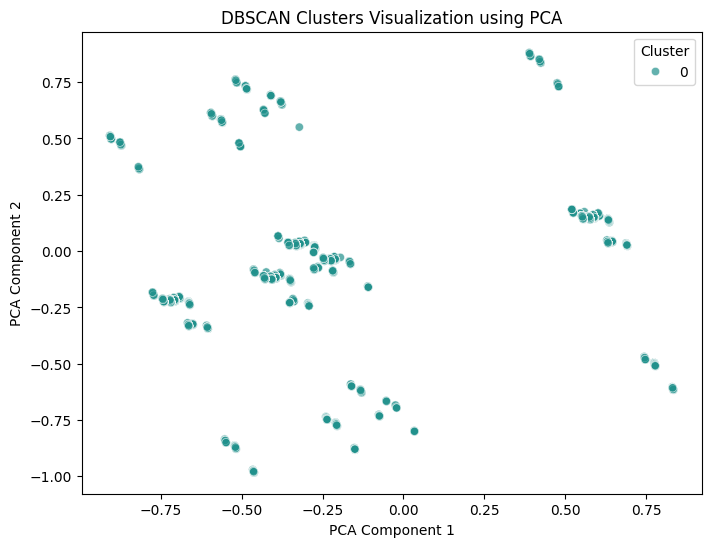

In [156]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce to 2D for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_selected.drop(columns=['Cluster']))

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_selected['Cluster'], palette='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clusters Visualization using PCA")
plt.legend(title="Cluster")
plt.show()


Segments products by popularity & brand influence.

In [157]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select numerical features
df_numeric = df_selected[['product_like_count', 'brand_encoded']]


# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_selected['Cluster_Numeric'] = kmeans.fit_predict(df_numeric)

# Check clusters
print(df_selected['Cluster_Numeric'].value_counts())



Cluster_Numeric
0    10025
1     3291
3      407
2        4
Name: count, dtype: int64


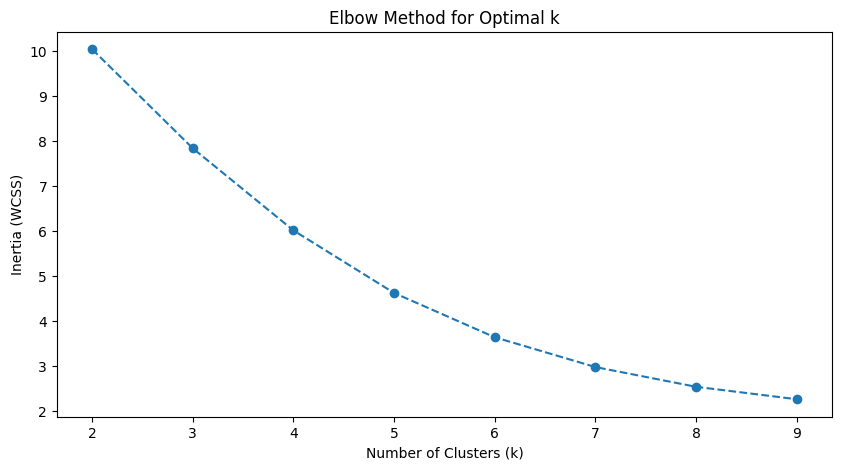

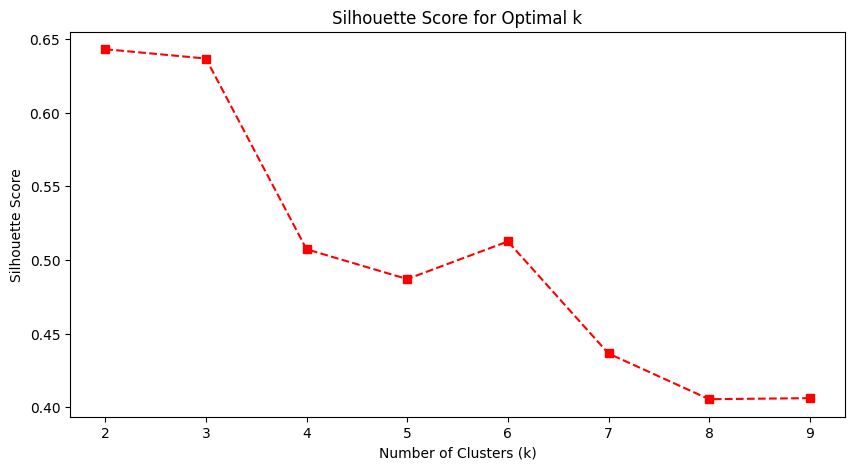

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score



# Find the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_numeric)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_numeric, labels))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='--', color='r')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


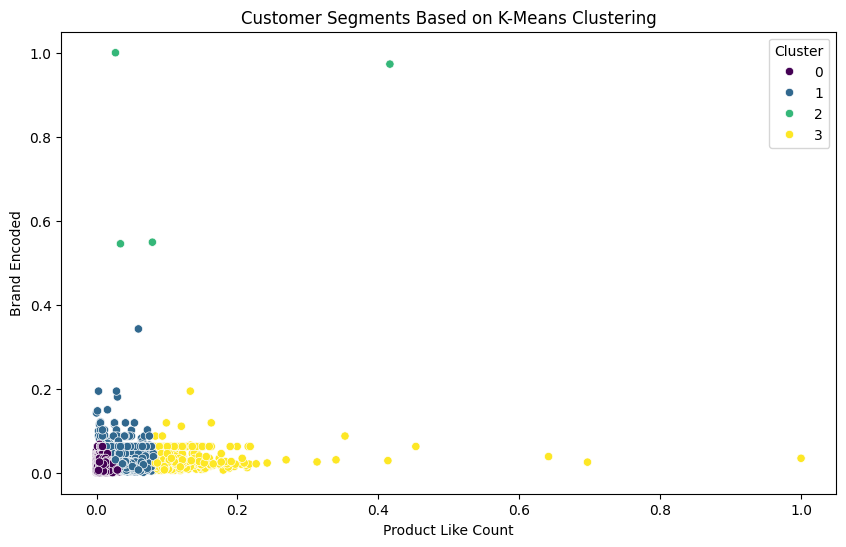

In [159]:
import seaborn as sns

# Apply optimized KMeans
optimal_k = 4  # Adjust based on the Elbow/Silhouette method
kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_selected['Cluster_Optimized'] = kmeans_opt.fit_predict(df_numeric)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_numeric['product_like_count'],
                y=df_numeric['brand_encoded'],
                hue=df_selected['Cluster_Optimized'],
                palette='viridis')
plt.xlabel('Product Like Count')
plt.ylabel('Brand Encoded')
plt.title('Customer Segments Based on K-Means Clustering')
plt.legend(title="Cluster")
plt.show()


In [160]:
import pandas as pd

# Get the columns used for clustering
cluster_columns = df_numeric.columns

# Create DataFrame with correct columns
cluster_centers = pd.DataFrame(kmeans_opt.cluster_centers_, columns=cluster_columns)

# Assuming you still have the MinMaxScaler instance used for transformation
cluster_centers[['brand_encoded_original', 'product_like_count_original']] = scaler_minmax.inverse_transform(
    cluster_centers[['brand_encoded', 'product_like_count']]
)



print(cluster_centers)


   product_like_count  brand_encoded  brand_encoded_original  \
0            0.010430       0.014889              196.160388   
1            0.041345       0.027385              343.620367   
2            0.139164       0.766745             9068.850000   
3            0.122565       0.027915              349.882153   

   product_like_count_original  
0                     7.363346  
1                    29.189509  
2                    98.250000  
3                    86.530713  


In [161]:
print(df_selected['Cluster_Optimized'].value_counts())


Cluster_Optimized
0    10025
1     3291
3      407
2        4
Name: count, dtype: int64


In [162]:
# prompt: give the distinct value of the df_encoded[['brand_name','brand_encoded']]

brand_df = df_encoded[['brand_name', 'brand_encoded']].drop_duplicates()
brand_df['brand_encoded_original'] = (brand_df['brand_encoded'] * std_brand) + mean_brand


brand_df


,brand_name,brand_encoded,brand_encoded_original
0,Miu Miu,0.021165,243.565407
9,Dior,0.034379,246.582976
12,La Perla,0.006988,240.327807
19,Gucci,0.023216,244.033671
53,Agent Provocateur,0.007433,240.429219
...,...,...,...
894706,Camilla Skovgaard,0.004332,239.721113
896973,Circus by Sam Edelman,0.000386,238.819905
898239,Via Roma xv,0.009097,240.809258
899847,FRANCESCO MILANO,0.003796,239.598810


In [163]:
import numpy as np

# Function to find the 10 closest brands to a given encoded value
def find_top_10_closest_brands(encoded_value, brand_df):
    closest_indices = (np.abs(brand_df['brand_encoded'] - encoded_value)).nsmallest(10).index
    return brand_df.loc[closest_indices, 'brand_name'].tolist()  # Return a list of top 10 brands

# Apply function to find the closest 10 brands for each cluster centroid
cluster_centers['top_10_brands'] = cluster_centers['brand_encoded'].apply(lambda x: find_top_10_closest_brands(x, brand_df))

# Print results
for i, row in cluster_centers.iterrows():
    print(f"Cluster {i} Centroid (Encoded: {row['brand_encoded']}):")
    print("Top 10 Closest Brands:", ", ".join(row['top_10_brands']))
    print("-" * 60)



Cluster 0 Centroid (Encoded: 0.014889385919140097):
Top 10 Closest Brands: Burberry, Pleats Please, Paraboot, Dries Van Noten, Aquazzura, Eyevan, DUKE + DEXTER, Marc Le Bihan, Martine Rose, Drake's
------------------------------------------------------------
Cluster 1 Centroid (Encoded: 0.027384882429392417):
Top 10 Closest Brands: BRIAN DALES, Simone Rocha, Maison Martin Margiela, MOORER, Tove, Zegna, Mach & Mach, Damiani, Visvim, Hereu
------------------------------------------------------------
Cluster 2 Centroid (Encoded: 0.7667453319831711):
Top 10 Closest Brands: Patek Philippe, Jordan x Dior, Hublot, Audemars Piguet, Panerai, Chopard, Frederique Constant, Chanel x Pharrell Williams, Tudor, Kired
------------------------------------------------------------
Cluster 3 Centroid (Encoded: 0.02791549507336147):
Top 10 Closest Brands: Simone Rocha, Tove, Mach & Mach, Hereu, Loewe, BRIAN DALES, 11 by Boris Bidjan Saberi, Maison Martin Margiela, MOORER, Elie Saab
------------------------

The clustering results reveal key insights into the segmentation of second-hand luxury products. The majority of items (10,025) fall into **Cluster 0**, indicating a large market for widely available and affordable luxury brands with moderate demand. **Cluster 1**, comprising 3,291 items, represents mid-range popularity brands that still hold value but do not dominate the second-hand market. In contrast, **Cluster 3** (407 items) appears to consist of highly desirable products with higher engagement, while **Cluster 2** (only 4 items) likely contains ultra-exclusive, rare luxury watch brands such as ** Patek Philippe, Hublot or Panerai**, suggesting that certain high-end brands are far less available in the resale market.

The relationship between **brand influence and popularity** further highlights that products with high like counts do not necessarily belong to influential brands. While **Cluster 0 brands** have lower influence and widespread availability, **Cluster 3 brands** exhibit a balance between desirability and exclusivity. Meanwhile, **Cluster 2 brands**, though extremely rare, likely command **premium pricing and a niche buyer segment**.

From a business perspective, second-hand luxury platforms should focus on **marketing heavily to Cluster 0 and 1** to drive high-volume sales while developing **premium, auction-based strategies** for Cluster 2. Cluster 3 presents opportunities for **curated collections and designer brand** to boost engagement. Further analysis into **pricing trends and brand-level patterns** could refine strategies for maximizing revenue from each segment.

Material & Color Cluster (Categorical Features)

In [164]:
# Select categorical features
df_categorical = df_selected[['product_material_encoded', 'product_color_encoded']]

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_selected['Cluster_KMeans'] = kmeans.fit_predict(df_categorical)

# Check cluster distribution
print(df_selected['Cluster_KMeans'].value_counts())


Cluster_KMeans
2    5186
1    4621
3    2184
0    1736
Name: count, dtype: int64


In [165]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_categorical, df_selected['Cluster_KMeans'])
print(f"K-Means Silhouette Score: {score}")


K-Means Silhouette Score: 0.7293376680173882


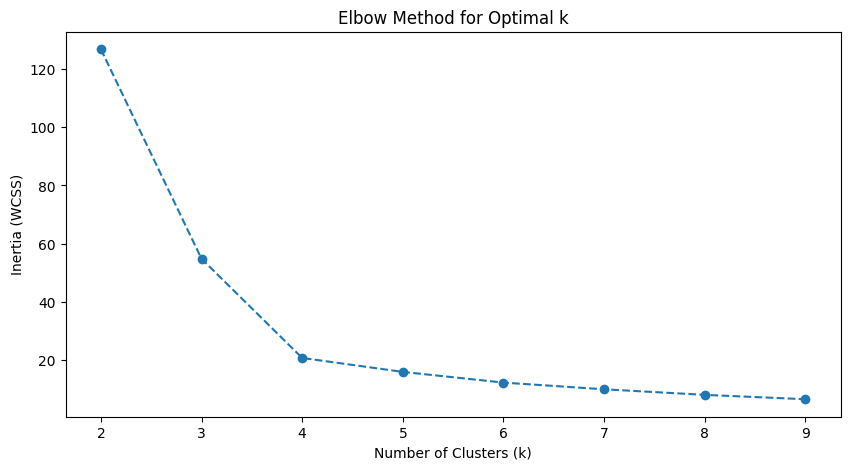

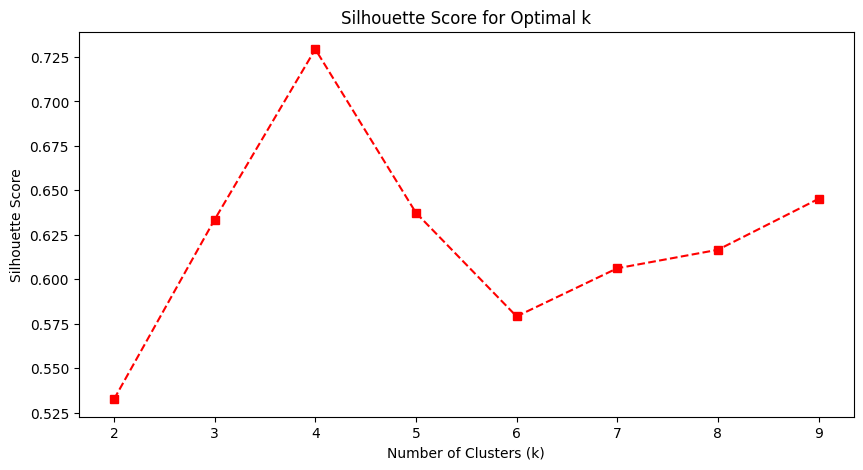

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score



# Find the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_categorical)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_categorical, labels))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='--', color='r')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


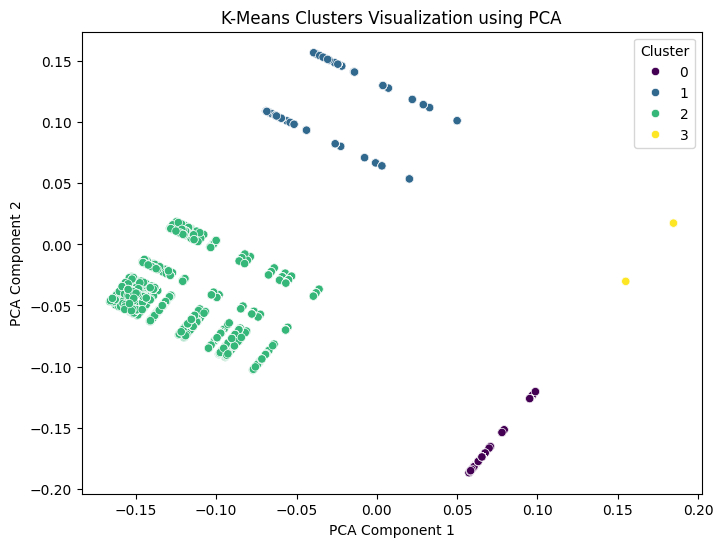

In [167]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_categorical)

# Add PCA components to DataFrame
df_selected['PCA1'] = df_pca[:, 0]
df_selected['PCA2'] = df_pca[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_KMeans', data=df_selected, palette='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clusters Visualization using PCA")
plt.legend(title="Cluster")
plt.show()


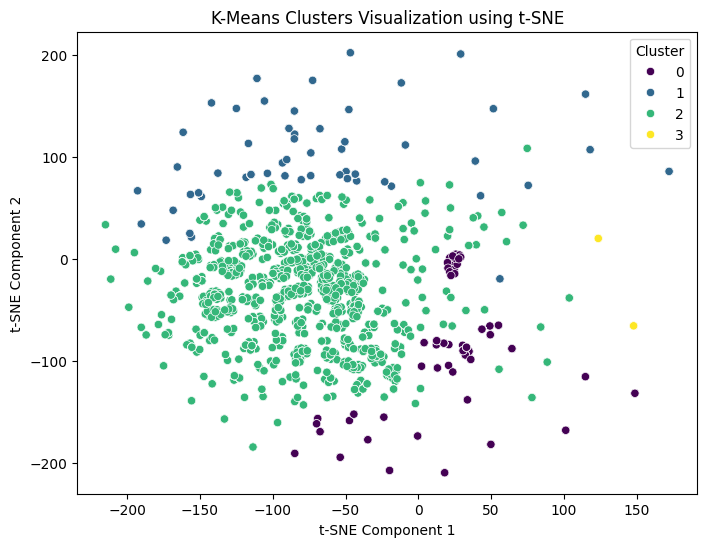

In [168]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure perplexity is less than the number of samples
n_samples = df_categorical.shape[0]
perplexity_value = min(30, n_samples - 1)  # Adjust dynamically

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
df_tsne = tsne.fit_transform(df_categorical)

# Add t-SNE components to DataFrame
df_selected['TSNE1'] = df_tsne[:, 0]
df_selected['TSNE2'] = df_tsne[:, 1]

# Scatter plot of clusters using t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster_KMeans', data=df_selected, palette='viridis')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("K-Means Clusters Visualization using t-SNE")
plt.legend(title="Cluster")
plt.show()


In [180]:
df_results = df_selected.groupby('Cluster_KMeans').agg(lambda x: x.value_counts().index[0])
df_results

,product_like_count,product_category_Men Clothing,product_category_Men Shoes,product_category_Women Accessories,product_category_Women Clothing,product_category_Women Shoes,product_season_Autumn / Winter,product_season_Spring / Summer,product_condition_Good condition,product_condition_Never worn,"product_condition_Never worn, with tag",product_condition_Very good condition,brand_encoded,product_material_encoded,product_color_encoded,Cluster,Cluster_Numeric,Cluster_Optimized,PCA1,PCA2,TSNE1,TSNE2,Cluster_Agglo
Cluster_KMeans,,,,,,,,,,,,,,,,,,,,,,,
0,0.004249,False,False,False,False,False,False,False,False,False,False,False,0.020449,0.071553,0.267595,0,0,0,0.095177,-0.126259,33.706310,-138.076691,0
1,0.002833,False,False,False,False,False,False,False,False,False,False,False,0.023216,0.240843,0.076035,0,0,0,0.022083,0.118714,51.531788,147.127045,0
2,0.002833,False,False,False,False,False,False,False,False,False,False,False,0.023216,0.074751,0.108916,0,0,0,-0.054949,-0.028982,84.044228,-66.747551,0
3,0.005666,False,False,False,False,False,False,False,False,False,False,False,0.023216,0.240843,0.267595,0,0,0,0.184681,0.017436,123.585953,20.055048,0


In [182]:
df_results_mean = df_selected.groupby('Cluster_KMeans').mean()
df_results_mean

,product_like_count,product_category_Men Clothing,product_category_Men Shoes,product_category_Women Accessories,product_category_Women Clothing,product_category_Women Shoes,product_season_Autumn / Winter,product_season_Spring / Summer,product_condition_Good condition,product_condition_Never worn,"product_condition_Never worn, with tag",product_condition_Very good condition,brand_encoded,product_material_encoded,product_color_encoded,Cluster,Cluster_Numeric,Cluster_Optimized,PCA1,PCA2,TSNE1,TSNE2,Cluster_Agglo
Cluster_KMeans,,,,,,,,,,,,,,,,,,,,,,,
0,0.022236,0.144009,0.095622,0.049539,0.324885,0.290323,0.137673,0.071429,0.109447,0.267281,0.167627,0.444124,0.019254,0.038467,0.267595,0.0,0.356567,0.356567,0.077685,-0.154342,37.176182,-142.387543,1.213134
1,0.020346,0.263579,0.129193,0.030729,0.231768,0.318979,0.008223,0.061459,0.116858,0.236096,0.172906,0.452283,0.017754,0.213306,0.063032,0.0,0.306644,0.306644,-0.003513,0.102215,-0.604183,103.798172,1.157325
2,0.020669,0.165831,0.079252,0.061126,0.391053,0.198419,0.176437,0.089664,0.095064,0.255496,0.167952,0.469919,0.018527,0.041719,0.059342,0.0,0.317586,0.317586,-0.097363,-0.041478,-49.491138,-36.879627,1.142692
3,0.023567,0.186355,0.204212,0.025641,0.113095,0.428114,0.013278,0.068681,0.124084,0.243590,0.173077,0.442308,0.019395,0.226078,0.267595,0.0,0.383242,0.383242,0.176875,0.004903,129.964096,-2.452031,1.185897


In [178]:
import numpy as np
# Function to find closest match
def find_closest_match(encoded_value, reference_df, column_name):
    closest_index = (np.abs(reference_df[column_name] - encoded_value)).idxmin()
    return reference_df.loc[closest_index, column_name.replace("_encoded", "")]


# Apply function to find closest product material and color for each cluster
df_results['Closest_Product_Material'] = df_results['product_material_encoded'].apply(
    lambda x: find_closest_match(x, df_color_material, 'product_material_encoded'))

df_results['Closest_Product_Color'] = df_results['product_color_encoded'].apply(
    lambda x: find_closest_match(x, df_color_material, 'product_color_encoded'))

# Display results
print(df_results[['Closest_Product_Material', 'Closest_Product_Color']])

               Closest_Product_Material Closest_Product_Color
Cluster_KMeans                                               
0                             Polyester                 Black
1                               Leather                 White
2                                  Silk                  Blue
3                               Leather                 Black


In [187]:
import numpy as np



df_results_mean['Closest_Product_Color'] = df_results_mean['product_color_encoded'].apply(
    lambda x: find_closest_match(x, df_color_material, 'product_color_encoded'))

# Display results
print(df_results_mean[[ 'Closest_Product_Color']])

               Closest_Product_Color
Cluster_KMeans                      
0                              Black
1                               Grey
2                               Grey
3                              Black


The clustering analysis of material and color preferences in second-hand luxury sales reveals distinct consumer trends. Cluster 0 primarily features polyester and black-colored items, indicating a preference for practical and versatile luxury fashion. Cluster 1, dominated by leather and white, suggests a market for premium and elegant accessories. The largest group, Cluster 2, favors silk and blue, highlighting a demand for sophisticated, high-fashion pieces like scarves and dresses. Meanwhile, Cluster 3, though the smallest, is associated with leather and black, likely representing luxury bags, shoes, and accessories that hold their value over time. Across clusters, leather remains dominant in high-end segments, while black is the most preferred color, emphasizing its timeless appeal in luxury shoes resale. This segmentation provides valuable insights for tailoring marketing strategies  in the second-hand luxury market.

Cluster Product Type & Season (Binary Features)

In [171]:
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering


# Select binary one-hot encoded features
df_binary = df_selected[[col for col in df_selected.columns if col.startswith('product_category') or
                         col.startswith('product_season') or col.startswith('product_condition')]]

# Compute Hamming distance matrix
distance_matrix = pdist(df_binary, metric='hamming')
distance_matrix = squareform(distance_matrix)

# Apply Agglomerative Clustering with precomputed distances
agglo = AgglomerativeClustering(n_clusters=4, linkage='average', metric="precomputed")
df_selected['Cluster_Agglo'] = agglo.fit_predict(distance_matrix)

# Print cluster distribution
print(df_selected['Cluster_Agglo'].value_counts())


Cluster_Agglo
0    6271
3    3452
1    2394
2    1610
Name: count, dtype: int64


In [172]:
from sklearn.metrics import silhouette_score

# Compute silhouette score (only works with >1 cluster)
if len(set(df_selected['Cluster_Agglo'])) > 1:
    score = silhouette_score(distance_matrix, df_selected['Cluster_Agglo'], metric='precomputed')
    print(f"Agglomerative Clustering Silhouette Score: {score}")
else:
    print("Only one cluster found. Silhouette Score cannot be computed.")


Agglomerative Clustering Silhouette Score: 0.5131266103683155


In [173]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Different linkage methods to try (excluding 'ward' as it requires Euclidean distance)
linkage_methods = ['complete', 'average', 'single']
best_score = -1
best_linkage = None

for linkage in linkage_methods:
    print(f"Testing linkage: {linkage}")

    # Apply Agglomerative Clustering
    agglo = AgglomerativeClustering(n_clusters=5, linkage=linkage, metric="precomputed")
    cluster_labels = agglo.fit_predict(distance_matrix)

    # Compute silhouette score only if there is more than 1 cluster
    if len(set(cluster_labels)) > 1:
        score = silhouette_score(distance_matrix, cluster_labels, metric="precomputed")
        print(f"Linkage: {linkage}, Silhouette Score: {score}")

        if score > best_score:
            best_score = score
            best_linkage = linkage

# Print the best linkage
print(f"Best Linkage: {best_linkage} with Silhouette Score: {best_score}")


Testing linkage: complete
Linkage: complete, Silhouette Score: 0.2996746505913359
Testing linkage: average
Linkage: average, Silhouette Score: 0.4378954338119246
Testing linkage: single
Linkage: single, Silhouette Score: -0.07403319988918519
Best Linkage: average with Silhouette Score: 0.4378954338119246


In [174]:
best_n_clusters = None
best_score = -1

for n_clusters in range(2, 10):  # Trying different cluster numbers
    agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=best_linkage, metric="precomputed")
    cluster_labels = agglo.fit_predict(distance_matrix)

    if len(set(cluster_labels)) > 1:  # Avoid single cluster issue
        score = silhouette_score(distance_matrix, cluster_labels, metric="precomputed")
        print(f"n_clusters: {n_clusters}, Silhouette Score: {score}")

        if score > best_score:
            best_score = score
            best_n_clusters = n_clusters

print(f"Optimal n_clusters: {best_n_clusters} with Silhouette Score: {best_score}")


n_clusters: 2, Silhouette Score: 0.2795675928947555
n_clusters: 3, Silhouette Score: 0.44428630570545363
n_clusters: 4, Silhouette Score: 0.5131266103683155
n_clusters: 5, Silhouette Score: 0.4378954338119246
n_clusters: 6, Silhouette Score: 0.39703042954359025
n_clusters: 7, Silhouette Score: 0.3881127644531115
n_clusters: 8, Silhouette Score: 0.3402583219141953
n_clusters: 9, Silhouette Score: 0.34238972725767935
Optimal n_clusters: 4 with Silhouette Score: 0.5131266103683155


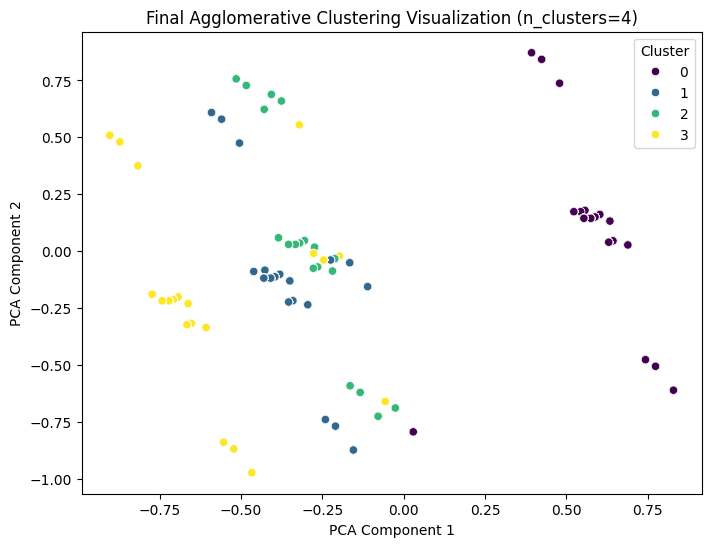

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce dimensions with PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_binary)

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_selected['Cluster_Agglo'], palette='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"Final Agglomerative Clustering Visualization (n_clusters=4)")
plt.legend(title="Cluster")
plt.show()


In [176]:
print(df_selected['Cluster_Agglo'].value_counts())


Cluster_Agglo
0    6271
3    3452
1    2394
2    1610
Name: count, dtype: int64


In [184]:
df_season= df_selected.groupby('Cluster_Agglo').mean()
df_season

,product_like_count,product_category_Men Clothing,product_category_Men Shoes,product_category_Women Accessories,product_category_Women Clothing,product_category_Women Shoes,product_season_Autumn / Winter,product_season_Spring / Summer,product_condition_Good condition,product_condition_Never worn,"product_condition_Never worn, with tag",product_condition_Very good condition,brand_encoded,product_material_encoded,product_color_encoded,Cluster,Cluster_Numeric,Cluster_Optimized,Cluster_KMeans,PCA1,PCA2,TSNE1,TSNE2
Cluster_Agglo,,,,,,,,,,,,,,,,,,,,,,,
0,0.020340,0.211450,0.103173,0.036836,0.319566,0.271408,0.105884,0.062829,0.00000,0.000000,0.000000,0.998884,0.018437,0.126464,0.118715,0.0,0.311912,0.311912,1.574868,-0.002162,-0.000937,6.207266,1.481472
1,0.022765,0.237260,0.134503,0.041353,0.286132,0.254804,0.076441,0.093567,0.00000,0.000000,0.977026,0.000000,0.017682,0.128873,0.119330,0.0,0.362991,0.362991,1.571846,-0.000366,0.000783,4.994565,3.468169
2,0.022136,0.164596,0.136025,0.053416,0.163975,0.404348,0.061491,0.062112,0.92795,0.000000,0.000000,0.000000,0.021312,0.140763,0.124915,0.0,0.355901,0.355901,1.559627,0.010660,0.007923,12.464245,10.780670
3,0.021318,0.166860,0.125145,0.053592,0.277231,0.283604,0.079664,0.088355,0.00000,0.988413,0.000000,0.000000,0.017858,0.125831,0.120724,0.0,0.325029,0.325029,1.562862,-0.000791,-0.002536,5.207498,0.261756


cluster 1: women clothing , with all season dominate, also strong prefer the never worn with tag
cluster 0: women clothing, with all season , prefer very good condition,
cluster 2: women shoes, all season, good condition, never worn
